In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Extracting Data from the Home_consumption_dataset to Dataframe
pow_df = pd.read_csv("powerconsumption.csv")
pow_df['Datetime']=pd.to_datetime(pow_df.Datetime)
pow_df = pow_df.set_index('Datetime')

In [4]:
#The data table
pow_df.head()

,Temperature,Humidity,WindSpeed,Power_Consumption
Datetime,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,70425.53544
2017-01-01 00:10:00,6.414,74.5,0.083,69320.84387
2017-01-01 00:20:00,6.313,74.5,0.080,67803.22193
2017-01-01 00:30:00,6.121,75.0,0.083,65489.23209
2017-01-01 00:40:00,5.921,75.7,0.081,63650.44627


In [5]:
pow_df.tail()

,Temperature,Humidity,WindSpeed,Power_Consumption
Datetime,,,,
2017-12-30 23:10:00,7.010,72.4,0.080,72798.08659
2017-12-30 23:20:00,6.947,72.6,0.082,70983.80786
2017-12-30 23:30:00,6.900,72.8,0.086,68675.04965
2017-12-30 23:40:00,6.758,73.0,0.080,67163.01682
2017-12-30 23:50:00,6.580,74.1,0.081,65750.53976


In [6]:
pow_df.isna().sum()

Temperature          0
Humidity             0
WindSpeed            0
Power_Consumption    0
dtype: int64

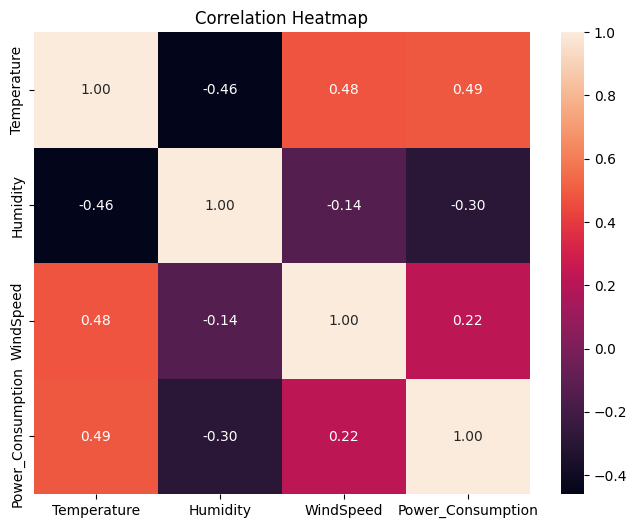

In [24]:
# Calculate correlation matrix
correlation_matrix = pow_df[['Temperature', 'Humidity', 'WindSpeed', 'Power_Consumption']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

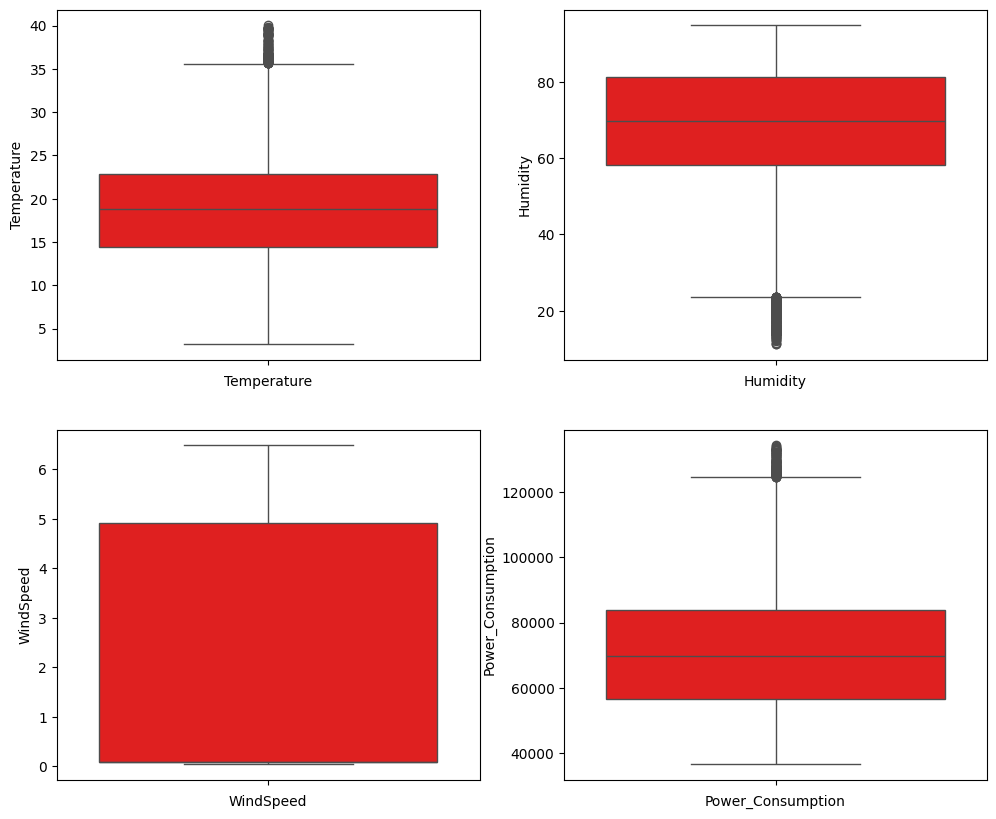

In [8]:
# Boxplots for all variables of the given dataset
index = 1
plt.figure(figsize = (12,10))
for i in pow_df.columns:
    plt.subplot(2,2,index)
    sns.boxplot(pow_df[i], color = 'red')
    plt.xlabel(i)
    index += 1

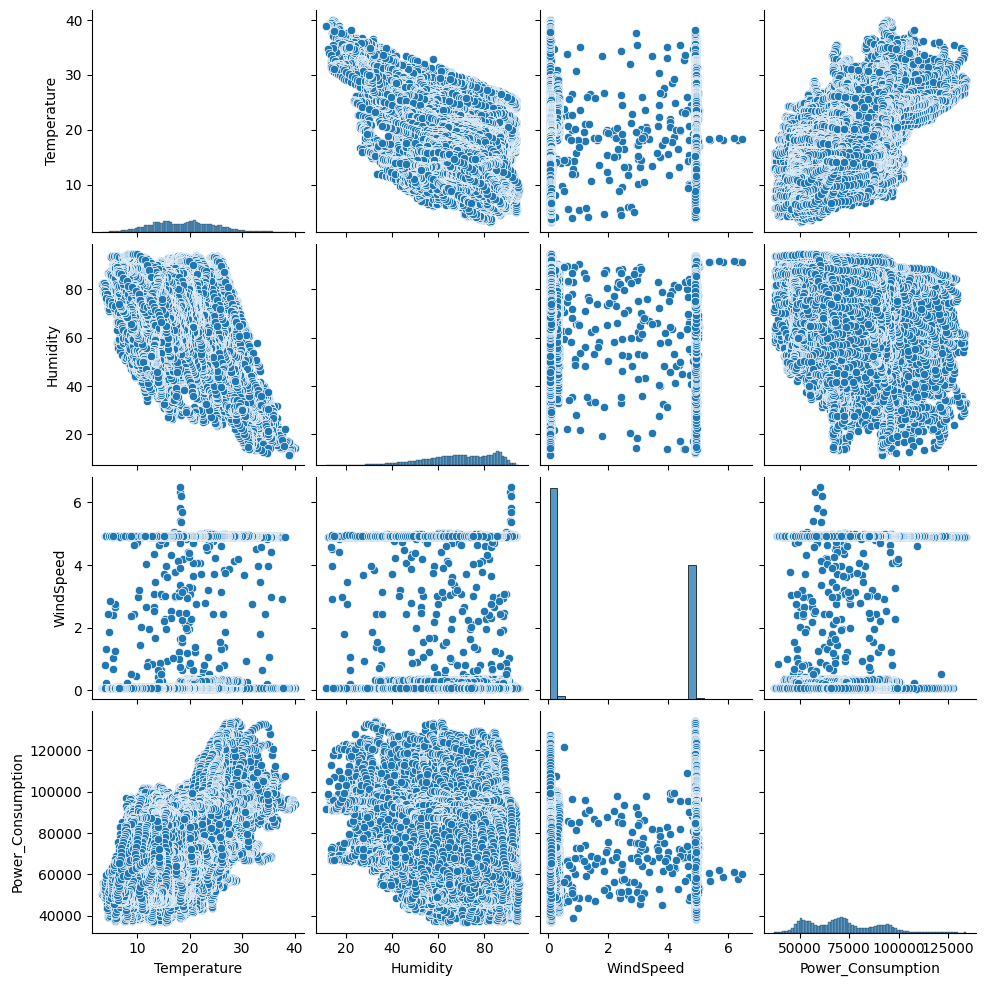

In [9]:
# Pairplot to visualize relationships between numerical columns
sns.pairplot(pow_df[['Temperature', 'Humidity', 'WindSpeed', 'Power_Consumption']])

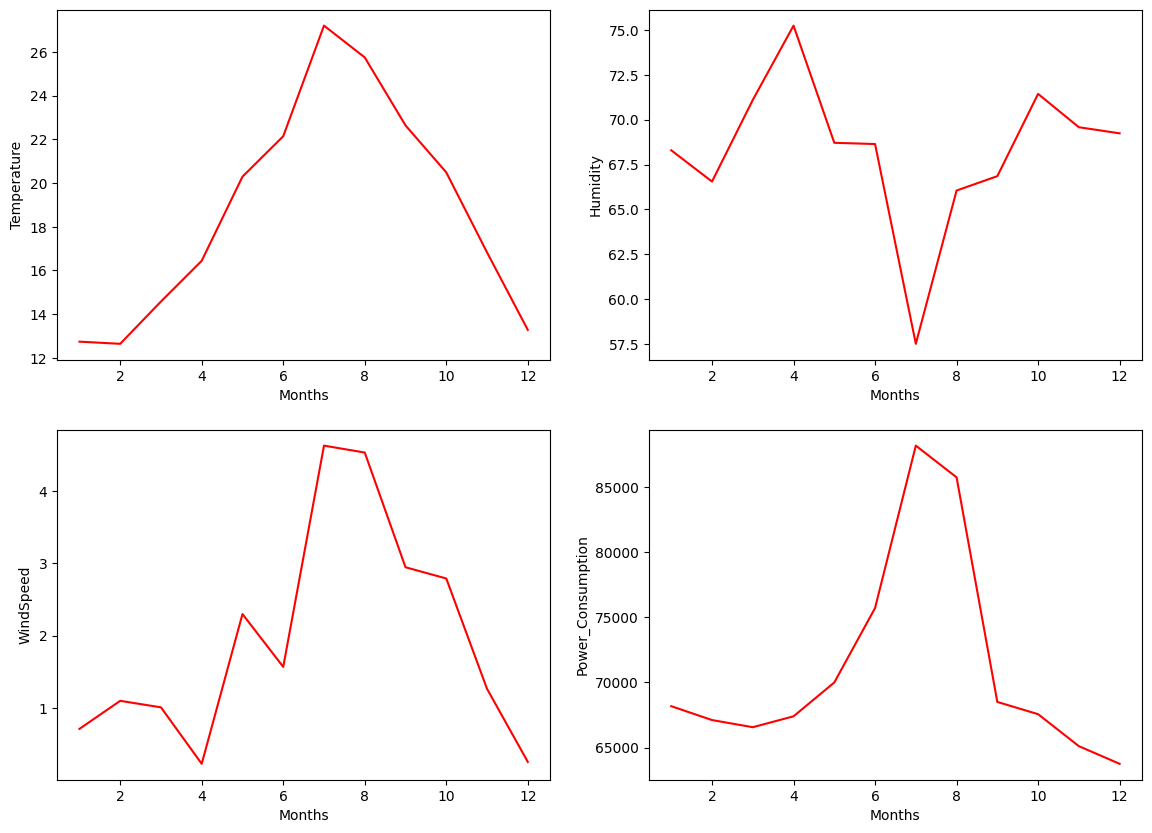

In [23]:
#Aggregate data by month
pow_df['month'] = pow_df.index.month
month_df = pow_df.groupby('month').mean()
index = 1
# Plot Monthly Power Consumption 
plt.figure(figsize=(14, 10))
for i in month_df.columns:
    plt.subplot(2,2,index)
    sns.lineplot(month_df[i], color = 'red')
    plt.xlabel('Months')
    index += 1
plt.show()
pow_df.drop(columns='month', inplace=True)

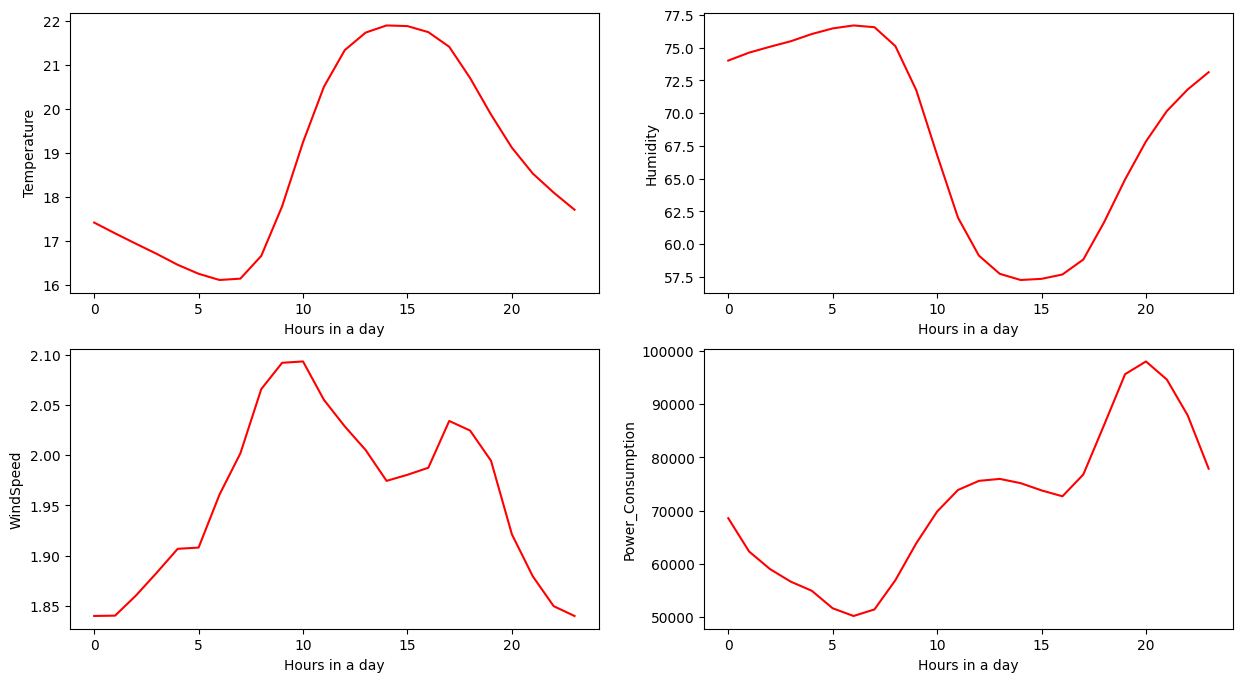

In [11]:
#Aggregate data by hour
pow_df['hour'] = pow_df.index.hour
hour_df = pow_df.groupby('hour').mean()
index = 1
# Plot Daily Power Consumption 
plt.figure(figsize=(15, 8))
for i in hour_df.columns:
    plt.subplot(2,2,index)
    sns.lineplot(hour_df[i], color = 'red')
    plt.xlabel('Hours in a day')
    index += 1
plt.show()
pow_df.drop(columns='hour', inplace=True)